# 实验要求
### 截止日期：10月22日

### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
1. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。


### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

### 基本要求

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# 读取数据集
data = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\ML_2\\winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
data = data.dropna()  # 删除包含NaN值的行
# 检查是否有缺失值
#missing_values = data.isnull().sum()
#if missing_values.any():
    # 处理缺失值，这里简单地使用中位数填充
    #data.fillna(data.median(), inplace=True)

In [8]:
# 划分特征和目标变量
X = data.drop(columns='quality',axis=1)
y = data['quality']

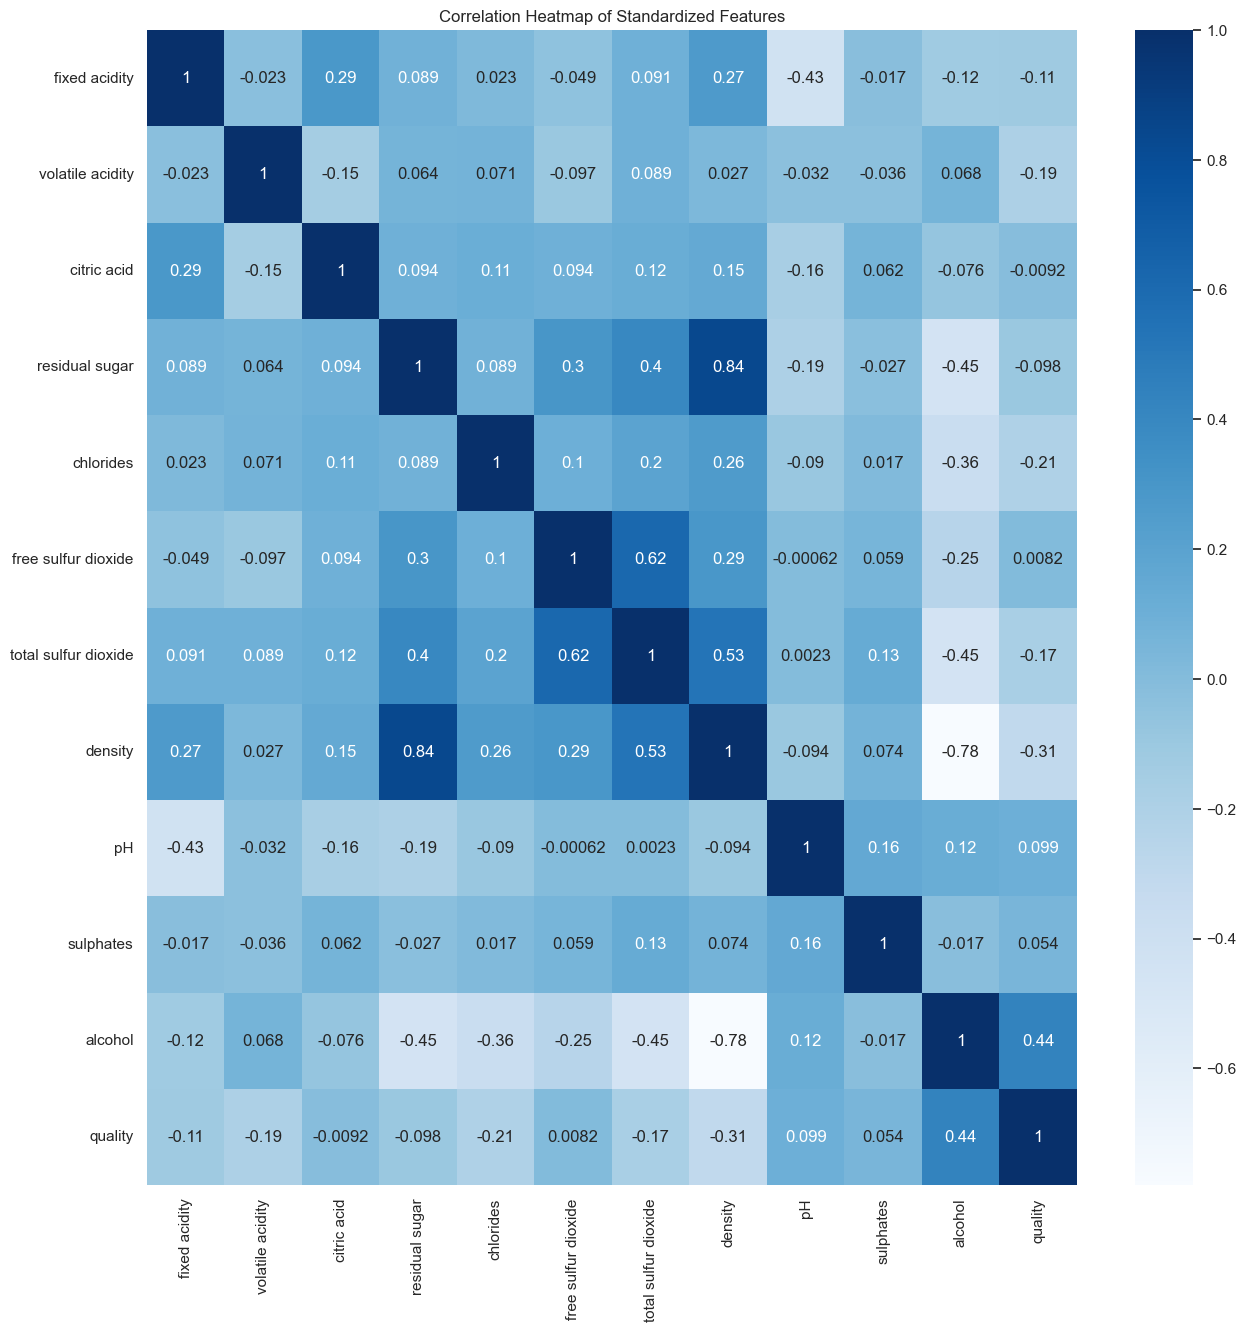

In [9]:
#热力图
correlation_matrix = np.corrcoef(data, rowvar=False)
sns.set(rc = {'figure.figsize':(15, 15)})
ax = sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues')
column_names = data.columns
ax.set_xticklabels(column_names, rotation=90)
ax.set_yticklabels(column_names, rotation=0)
bottom, top = ax.get_ylim()
plt.title('Correlation Heatmap of Standardized Features')
plt.show()

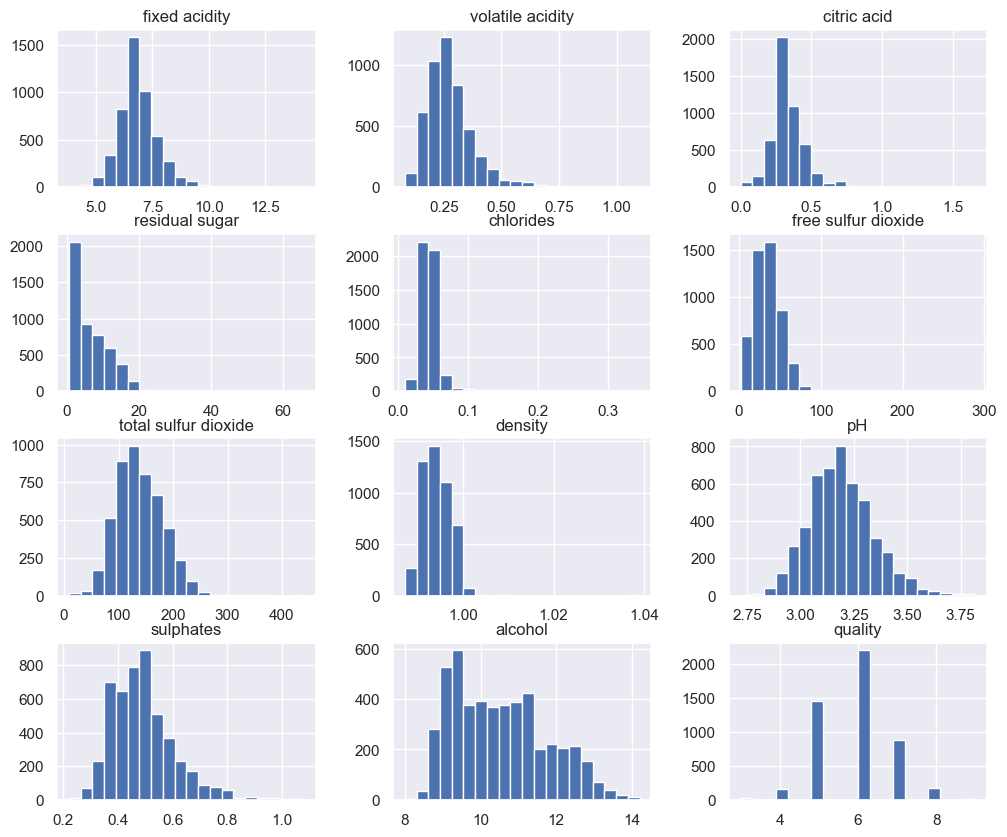

In [10]:
# 直方图
data.hist(bins=20, figsize=(12, 10))
plt.show()

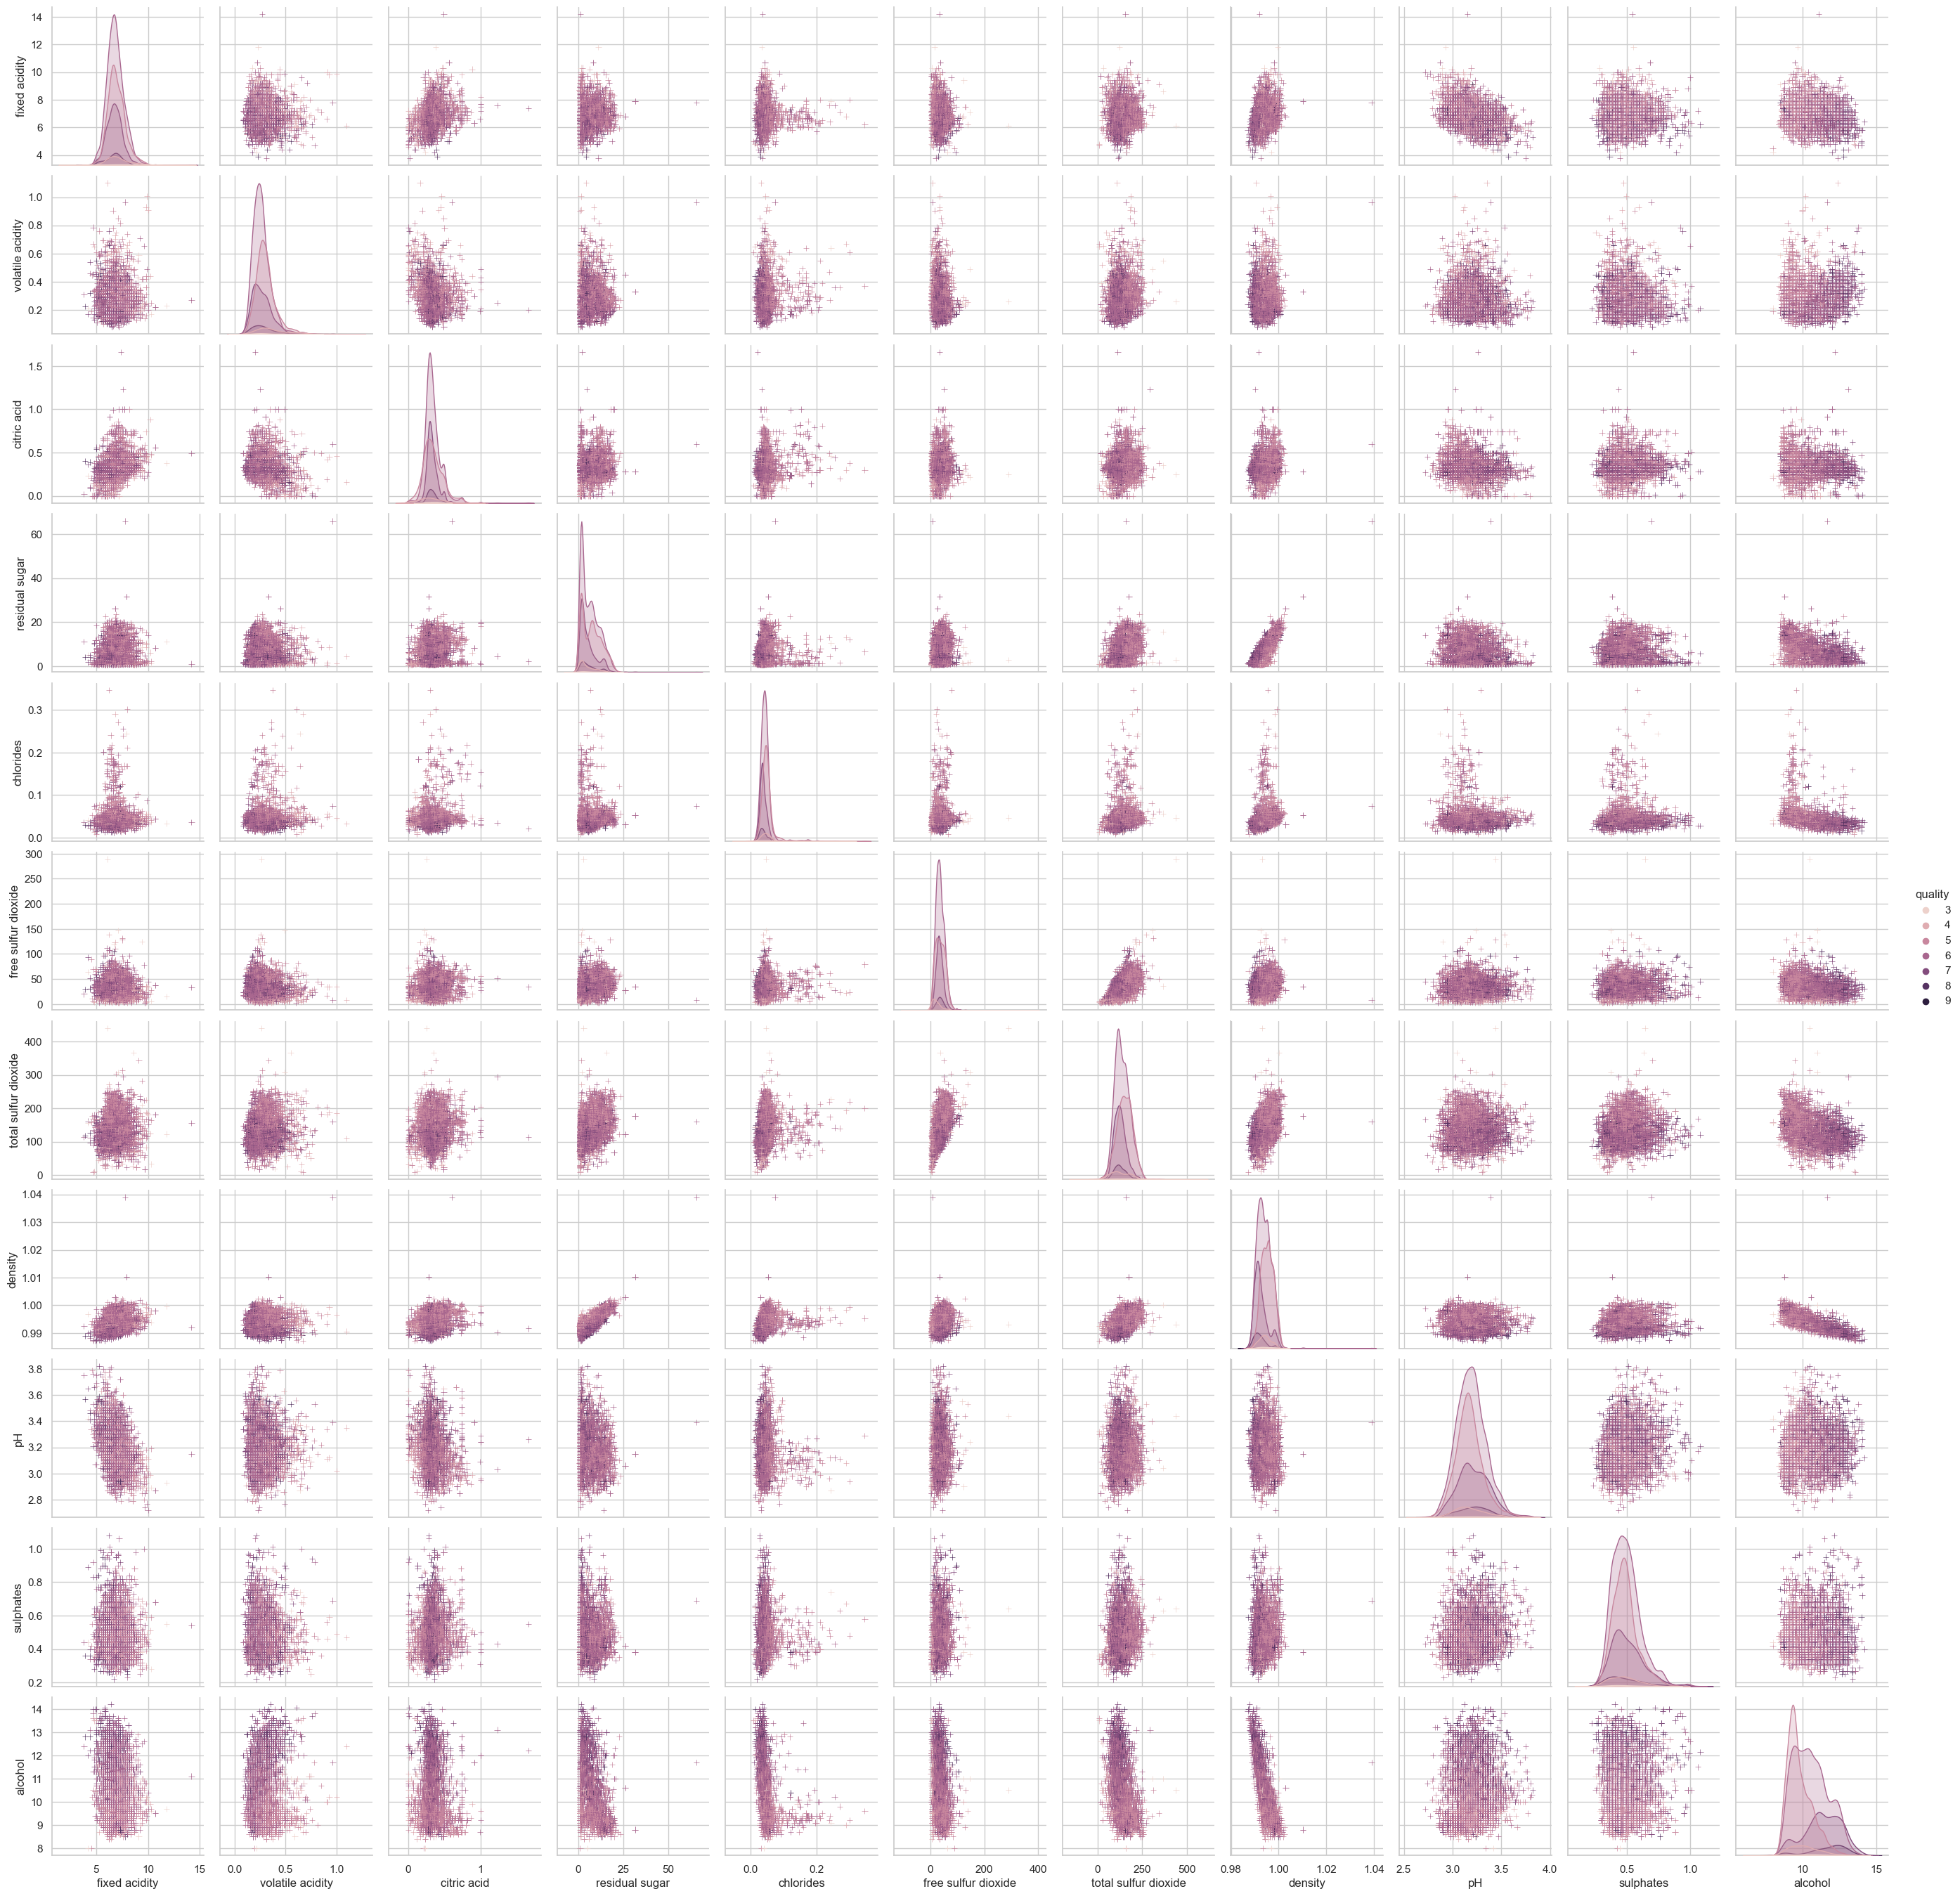

In [11]:
# 使用pairplot创建所有属性的散点图
sns.set(style="whitegrid")
sns.pairplot(data, diag_kind="kde", markers="+", hue="quality")
plt.show()

In [12]:
X['bias']=1

In [13]:
# 划分训练集和测试集（按4:1比例），进行分层采样
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# 线性回归模型
def linear_regression(X, y, learning_rate, num_epochs, optimizer):
    m, n = X.shape
    theta = np.random.randn(n)  # 随机初始化参数向量
    #theta = np.zeros(n)
    #theta = np.random.rand(X.shape[1])
    mse_history = []  # 用于存储MSE的历史值
    y = y.values
    
    for epoch in range(num_epochs):
        # 对于批量梯度下降（BGD），计算整个训练集的梯度
        if optimizer == "BGD":
            gradient = np.dot(X.T, np.dot(X, theta) - y) / m  # 计算梯度（批量梯度下降）
            theta -= learning_rate * gradient  # 更新权重，通过学习率乘以梯度来更新权重向量
            mse = np.mean(np.square(np.dot(X, theta) - y))  # 计算均方误差
            mse_history.append(mse)

        # 对于随机梯度下降（SGD），每次只计算一个随机样本的梯度
        elif optimizer == "SGD":
            for i in range (m):
                random_index = np.random.randint(0,m)  # 随机选择一个训练样本的索引
                xi = X[random_index] # 随机选择的单个训练样本的特征
                yi = y[random_index] # 随机选择的单个训练样本的目标值
                gradient = np.dot(xi.T ,(np.dot(xi, theta) - yi))
                theta -= learning_rate * gradient  # 更新权重，通过学习率乘以梯度来更新权重向量
            #mse = np.mean(np.square(np.dot(X, theta) - y))  # 计算均方误差
            mse = mean_squared_error(y,np.dot(X, theta))
            mse_history.append(mse)

        else:
            raise ValueError("Invalid optimizer")
    return theta, mse_history


In [66]:
# 训练参数
learning_rates = [0.001, 0.003, 0.005, 0.007, 0.01]  # 不同学习率
num_epochs = 200

In [67]:
# 定义一个函数，用于寻找最佳学习率
def find_best_learning_rate(X_train, y_train, X_test, y_test, learning_rates, num_epochs, optimizer):
    best_lr = None
    best_mse = float('inf')  # 初始设为无穷大
    #mse_history_dict = {}  # 存储不同学习率下的MSE历史数据
    mse_history_list = []  # 存储不同学习率下的MSE历史数据

    for lr in learning_rates:
        # 训练模型
        theta, mse_history = linear_regression(X_train, y_train, lr, num_epochs, optimizer)

        # 使用训练好的模型在测试集上计算MSE
        test_mse = np.mean((np.dot(X_test, theta) - y_test) ** 2)

        # 存储MSE历史数据
        #mse_history_dict[lr] = mse_history
        mse_history_list.append((learning_rate, mse_history, test_mse))

        # 如果当前学习率下的MSE更小，则更新最佳学习率和最小MSE
        if test_mse < best_mse:
            best_lr = lr
            best_mse = test_mse

    return best_lr, best_mse, mse_history_list

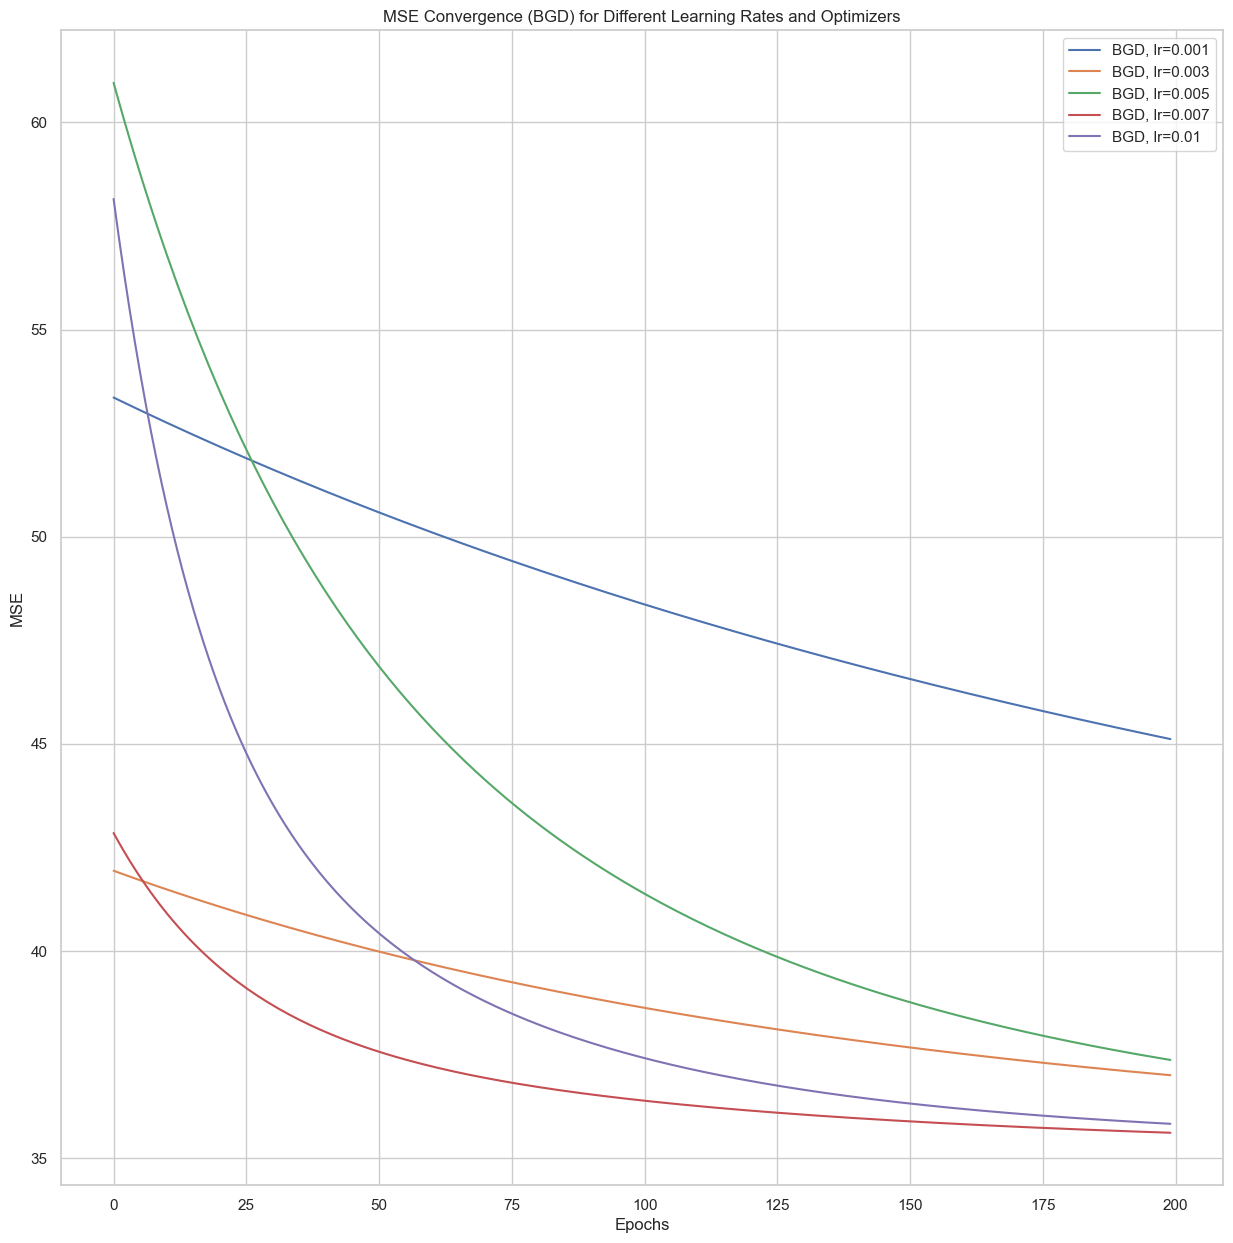

Test MSE (BGD) with best learning rate: 35.1537
Best Learning Rate: 0.01


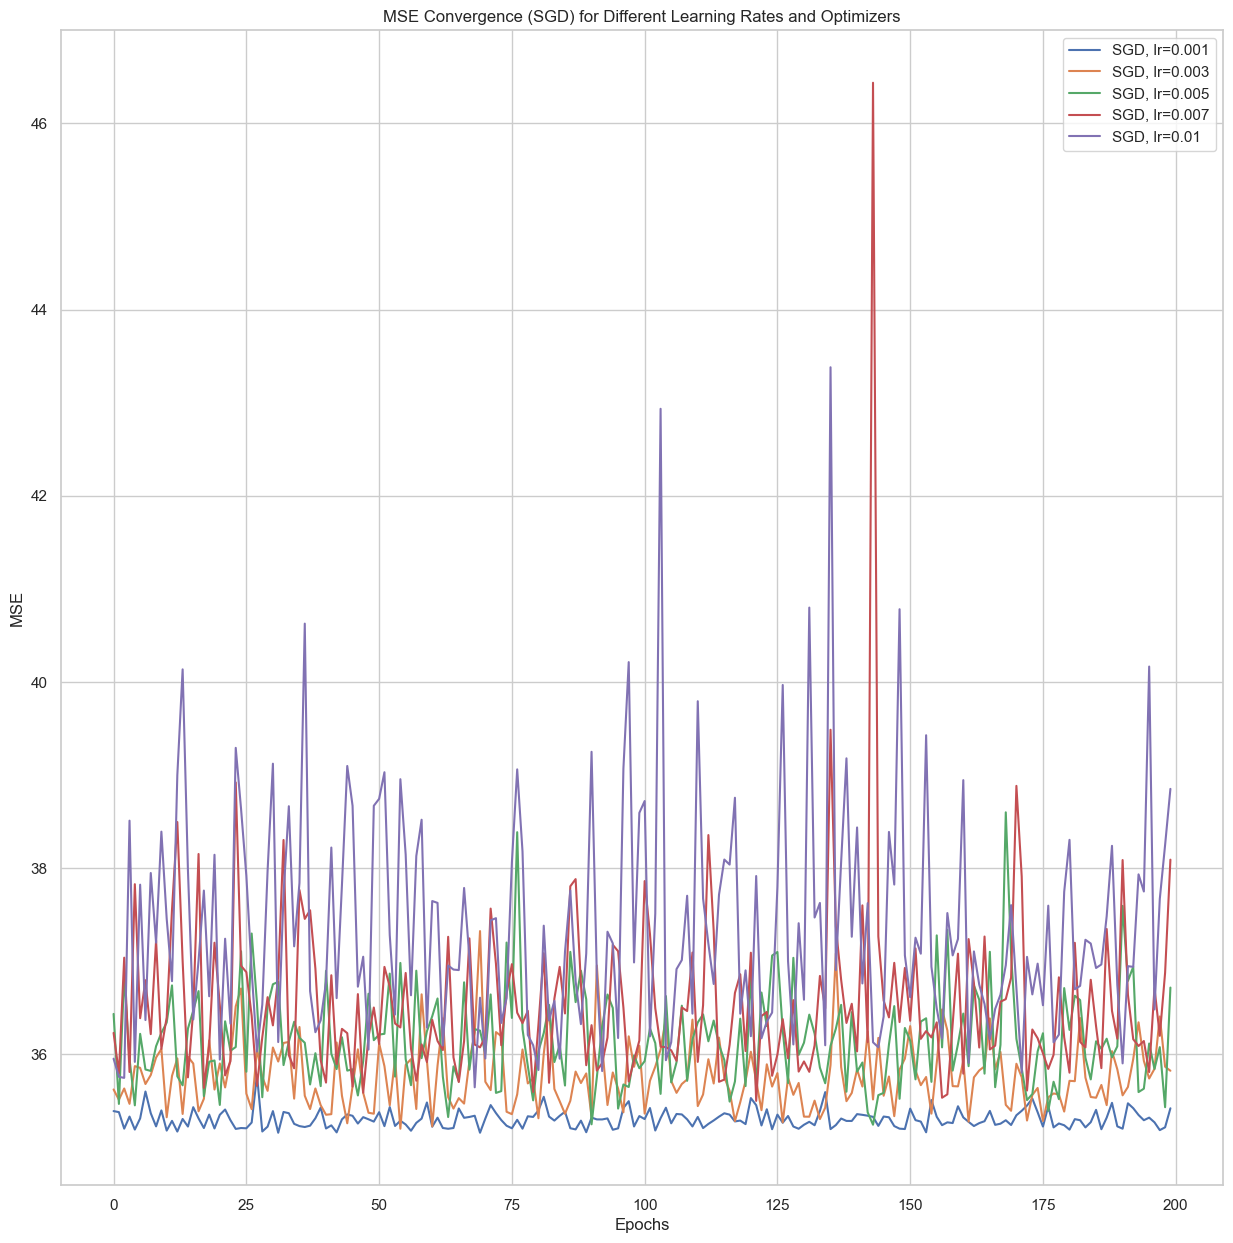

Test MSE (SGD) with best learning rate: 35.0136
Best Learning Rate: 0.001


In [68]:
# 训练模型并绘制MSE曲线
for optimizer in ["BGD", "SGD"]:
    for learning_rate in learning_rates:
         theta, mse_history = linear_regression(X_train, y_train, learning_rate, num_epochs, optimizer)       
         plt.plot(range(len(mse_history)), mse_history, label=f"{optimizer}, lr={learning_rate}")
            
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title(f'MSE Convergence ({optimizer}) for Different Learning Rates and Optimizers')
    plt.legend()
    plt.show()
    
    # 调用函数寻找最佳学习率
    best_lr, best_mse, mse_history_list = find_best_learning_rate(X_train, y_train, X_test, y_test, learning_rates, num_epochs, optimizer)
    
    print(f'Test MSE ({optimizer}) with best learning rate: {best_mse:.4f}')
    print(f"Best Learning Rate: {best_lr}")

### 中级要求

#### 目标和重点:

统计学: 在统计学中，回归分析通常用于理解和解释变量之间的关系，以及如何影响或预测因变量。统计学强调因果关系的推断，参数估计的精确性和假设检验。统计模型的目标通常是解释数据和理解随机性。

机器学习: 机器学习的主要目标是构建可重复的模型，能够预测或分类新数据，而不太关心变量之间的因果关系，确定预测结果的可行性。机器学习强调模型的泛化性能，对新数据的预测准确性，以及模型的复杂性。机器学习模型的目标是最大化性能，而不太关注参数的解释性。

#### 数据处理:

统计学: 统计学通常处理小样本数据，强调采样方法、偏差和方差的控制，以及参数估计的置信区间。统计学基于一系列假设，使用各种假设检验来验证关于参数估计和因果关系的统计显著性。

机器学习: 机器学习不基于假设，通常处理大规模数据集，强调数据预处理、特征工程和模型选择。机器学习使用交叉验证和性能度量来评估模型的泛化性能，而不是偏差和方差的权衡。

#### 模型复杂性:

统计学: 统计模型通常相对简单，受到参数数量的限制，以确保模型能够很好地泛化到数据的潜在分布。经典的线性回归模型是一个例子。

机器学习: 机器学习模型可以非常复杂，包括深度神经网络、决策树、支持向量机等，这些模型通常具有大量参数，可以更好地拟合复杂的数据分布和关系。

#### 模型选择和评估:

统计学: 统计学侧重于使用信息准则（如AIC和BIC）来选择适当的模型，以及使用假设检验来评估模型参数的显著性。

机器学习: 机器学习使用交叉验证、损失函数和性能指标（如均方误差、准确度等）来选择和评估模型的性能。

#### 应用领域:

统计学: 统计学广泛应用于社会科学、医学研究和生态学等领域，强调解释性和因果关系。

机器学习: 机器学习广泛应用于计算机视觉、自然语言处理、推荐系统、金融等领域，强调预测性能和自动化。

### 高级要求

In [69]:
# 岭回归解析法
def ridge_regression(X, y, lam):
    # X: 特征矩阵
    # y: 目标值
    # lam: 岭回归的超参数

    n, m = X.shape
    I = np.identity(m)  # 单位矩阵
    theta = np.linalg.inv(X.T.dot(X) + lam * I).dot(X.T).dot(y)
    return theta

In [70]:
# 训练岭回归模型
lam = 0.1  # 岭回归超参数
theta_ridge = ridge_regression(X_train, y_train, lam)

In [71]:
# 预测
y_train_pred = X_train.dot(theta_ridge)
y_test_pred = X_test.dot(theta_ridge)

In [72]:
# 计算均方误差
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Ridge Regression - MSE (Train):", mse_train)
print("Ridge Regression - MSE (Test):", mse_test)

Ridge Regression - MSE (Train): 35.110331789912195
Ridge Regression - MSE (Test): 35.088205617421096
